In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [2]:
data = pd.read_csv('FinalData.csv')
data.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,description,region
0,0,n1WpP7iowLc,2017-11-14 00:00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,1,0dBIkQ4Mz1M,2017-11-14 00:00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,CA
2,2,5qpjK5DgCt4,2017-11-14 00:00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,3,d380meD0W0M,2017-11-14 00:00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,CA
4,4,2Vv-BfVoq4g,2017-11-14 00:00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [3]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,description,region
0,n1WpP7iowLc,2017-11-14 00:00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14 00:00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14 00:00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14 00:00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14 00:00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [4]:
import seaborn as sns
sns.set()
sns.__version__

'0.11.1'

Text(0.5, 1.0, 'likes vs. views')

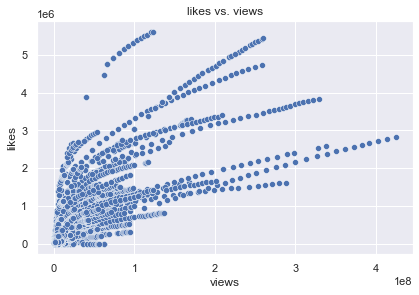

In [5]:
# A correlation between likes and views
sns.scatterplot(x = 'views', y = 'likes', data = data)
plt.title('likes vs. views')

In [6]:
# Examinig correlation using .corr() method 
corr_ft = data[['views', 'likes', 'dislikes', 'comment_count']]
corr = corr_ft.corr()
display(corr)

,views,likes,dislikes,comment_count
views,1.000000,0.790342,0.414937,0.501701
likes,0.790342,1.000000,0.454131,0.773195
dislikes,0.414937,0.454131,1.000000,0.733559
comment_count,0.501701,0.773195,0.733559,1.000000


<AxesSubplot:>

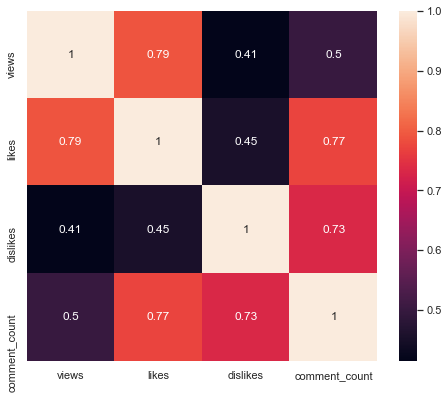

In [7]:
plt.figure(figsize = (7,6))
sns.heatmap(corr, annot = True)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(corr_ft.values,i) for i in range (corr_ft.shape[1])]
vif['Features'] = corr_ft.columns
vif

,VIF,Features
0,0.073927,views
1,7.465813,likes
2,2.847708,dislikes
3,6.228235,comment_count


In [10]:
data2= data.copy()
data2.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,description,region
count,158098,158098,158098,158098,158098.000000,157829,158098,158098,1.580980e+05,1.580980e+05,1.580980e+05,1.580980e+05,155059,158098
unique,45154,205,45832,8080,NaN,17,43781,37081,NaN,NaN,NaN,NaN,41611,4
top,#NAME?,2017-11-24 00:00:00,Mission: Impossible - Fallout (2018) - Officia...,The Late Show with Stephen Colbert,NaN,Entertainment,2018-05-18 14:00:04,[none],NaN,NaN,NaN,NaN,► Listen LIVE: http://power1051fm.com/\n► Face...,US
freq,511,800,77,639,NaN,49251,82,7311,NaN,NaN,NaN,NaN,300,40949
mean,NaN,NaN,NaN,NaN,19.790250,NaN,NaN,NaN,2.613847e+06,6.898179e+04,3.748059e+03,7.345998e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,7.405367,NaN,NaN,NaN,1.059344e+07,2.284840e+05,3.189644e+04,3.438558e+04,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,1.690242e+05,2.440000e+03,1.390000e+02,3.260000e+02,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,4.956635e+05,1.116200e+04,4.630000e+02,1.270000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,1.530977e+06,4.407775e+04,1.617000e+03,4.419000e+03,NaN,NaN


In [11]:
data2.isnull().sum() 

video_id            0
trending_date       0
title               0
channel_title       0
category_id         0
category          269
publish_time        0
tags                0
views               0
likes               0
dislikes            0
comment_count       0
description      3039
region              0
dtype: int64

In [12]:
data2 = data2.drop(['video_id', 'title', 'channel_title', 'description'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158098 entries, 0 to 158097
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   trending_date  158098 non-null  object
 1   category_id    158098 non-null  int64 
 2   category       157829 non-null  object
 3   publish_time   158098 non-null  object
 4   tags           158098 non-null  object
 5   views          158098 non-null  int64 
 6   likes          158098 non-null  int64 
 7   dislikes       158098 non-null  int64 
 8   comment_count  158098 non-null  int64 
 9   region         158098 non-null  object
dtypes: int64(5), object(5)
memory usage: 12.1+ MB


In [13]:
print('we have',data2['category_id'].nunique(), 'unique category, the categories are presented in the json file')

we have 17 unique category, the categories are presented in the json file


<AxesSubplot:xlabel='category_id', ylabel='count'>

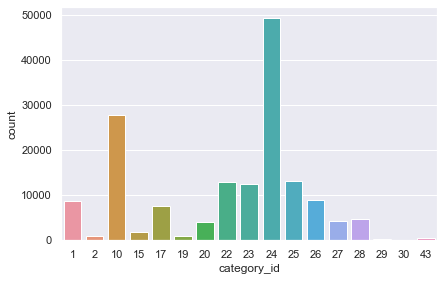

In [14]:
sns.countplot(x = data2['category_id'])

In [15]:
data2['publish_time'] = pd.to_datetime(data2['publish_time'])
data2 = data2.assign(publish_day = data2.publish_time.dt.day, 
                     publish_month = data2.publish_time.dt.month, 
                     publish_year = data2.publish_time.dt.year, 
                     publish_weekday = data2.publish_time.dt.weekday)

In [16]:
print(data2['publish_year'].value_counts())

2018    116482
2017     40824
2015       135
2013       115
2011       112
2016       106
2014       104
2008        59
2010        56
2012        39
2007        37
2009        28
2006         1
Name: publish_year, dtype: int64


In [17]:
print(data2.groupby('publish_year')['likes'].mean())

publish_year
2006      459.000000
2007      351.216216
2008      400.474576
2009      208.250000
2010      843.571429
2011      734.919643
2012      714.948718
2013      748.408696
2014      856.759615
2015      930.829630
2016      935.367925
2017    47705.940207
2018    76902.320178
Name: likes, dtype: float64


<AxesSubplot:xlabel='publish_year', ylabel='count'>

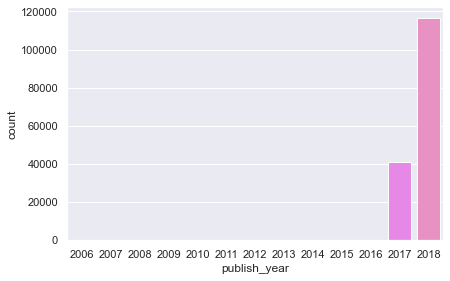

In [18]:
sns.countplot(x = data2['publish_year'])

In [19]:
data2 = data2[data2['publish_year'].isin([2017,2018])]

In [20]:
data2.groupby('publish_year')['likes'].mean()

publish_year
2017    47705.940207
2018    76902.320178
Name: likes, dtype: float64

In [21]:
data2['publish_month'].value_counts(sort = True)

12    24267
3     23232
5     23111
1     22902
2     22701
4     18690
11    16311
6      5925
10       97
9        35
8        19
7        16
Name: publish_month, dtype: int64

<AxesSubplot:xlabel='publish_month', ylabel='count'>

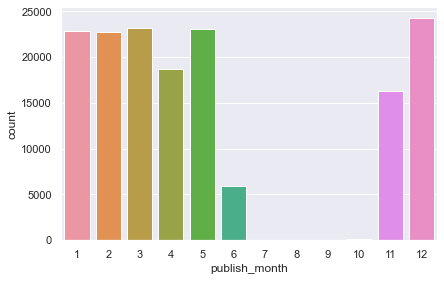

In [22]:
sns.countplot(x = data2['publish_month'], data = data2)

In [23]:
data2 = data2[(data2['publish_month']<7) | (data2['publish_month']>10)]

In [24]:
data2.groupby('publish_month')['likes'].mean()

publish_month
1      50639.043053
2      65405.287344
3      75451.569861
4     103949.493633
5      97340.356800
6      62141.686920
11     49242.008031
12     47089.275683
Name: likes, dtype: float64

<AxesSubplot:xlabel='publish_month', ylabel='likes'>

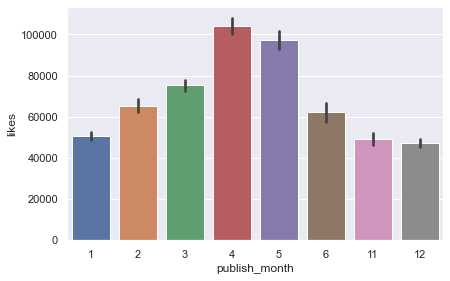

In [25]:
sns.barplot(x = data2['publish_month'],y = data2['likes'])

In [26]:
data2['publish_weekday'].value_counts()

4    27671
3    25603
2    24635
1    23706
0    22992
5    16667
6    15865
Name: publish_weekday, dtype: int64

<AxesSubplot:xlabel='publish_weekday', ylabel='count'>

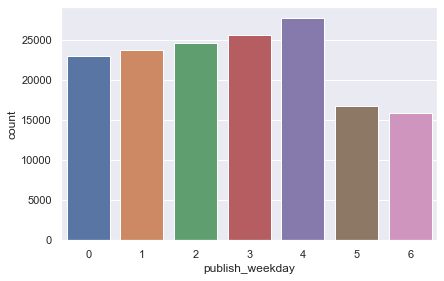

In [27]:
sns.countplot(x = data2['publish_weekday'])

<AxesSubplot:xlabel='publish_weekday', ylabel='likes'>

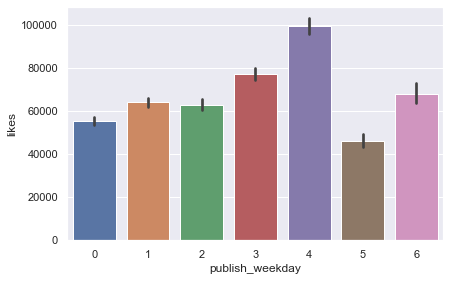

In [28]:
sns.barplot(x = data2['publish_weekday'], y = data2['likes'])

In [29]:
data2['publish_hour'] = data2.publish_time.dt.hour

<AxesSubplot:xlabel='publish_hour', ylabel='count'>

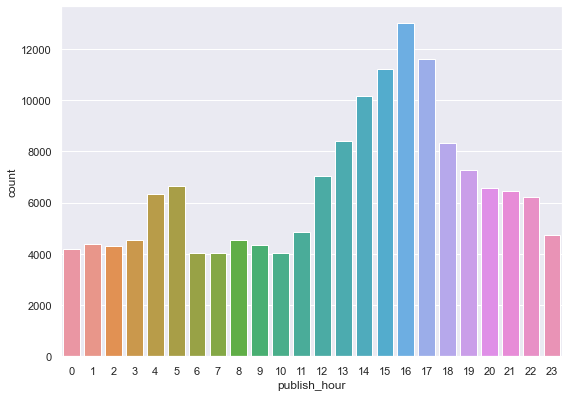

In [30]:
plt.figure(figsize = (8,6))
sns.countplot(x = data2['publish_hour'])

<AxesSubplot:xlabel='publish_hour', ylabel='likes'>

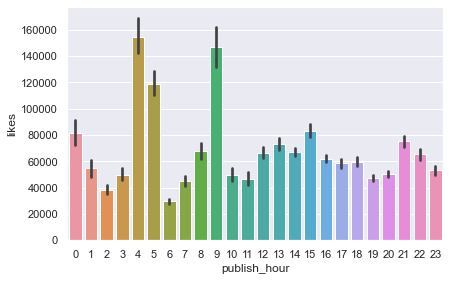

In [31]:
sns.barplot(x = data2['publish_hour'], y = data2['likes'])

In [32]:
data2['trending_date'] = pd.to_datetime(data2['trending_date'], format='%Y-%m-%d %H:%M:%S')

In [33]:
data2['publish_date'] = data2.publish_time.dt.date
data2['publish_date'] = pd.to_datetime(data2['publish_date'])

In [34]:
data2['days_diff'] = data2['trending_date'] - data2['publish_date']
data2['days_diff'].describe(percentiles = [0.1,0.25,0.50,0.75,0.90])

count                       157139
mean     5 days 18:27:30.457238495
std      9 days 04:45:21.220027009
min                0 days 00:00:00
10%                1 days 00:00:00
25%                1 days 00:00:00
50%                3 days 00:00:00
75%                7 days 00:00:00
90%               14 days 00:00:00
max              380 days 00:00:00
Name: days_diff, dtype: object

<AxesSubplot:ylabel='Density'>

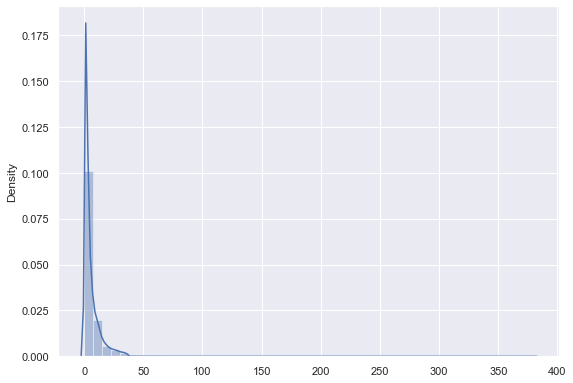

In [35]:
plt.figure(figsize = (8,6))
sns.distplot(x = data2['days_diff']/86400000000000)

In [36]:
data2.head()

,trending_date,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,region,publish_day,publish_month,publish_year,publish_weekday,publish_hour,publish_date,days_diff
0,2017-11-14,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,CA,10,11,2017,4,17,2017-11-10,4 days
1,2017-11-14,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,CA,13,11,2017,0,17,2017-11-13,1 days
2,2017-11-14,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,CA,12,11,2017,6,19,2017-11-12,2 days
3,2017-11-14,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,CA,12,11,2017,6,18,2017-11-12,2 days
4,2017-11-14,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,CA,9,11,2017,3,11,2017-11-09,5 days


In [37]:
data2['no_tags'] = [x.count("|") + 1 for x in data2['tags']]
data2.describe()

,category_id,views,likes,dislikes,comment_count,publish_day,publish_month,publish_year,publish_weekday,publish_hour,days_diff,no_tags
count,157139.000000,1.571390e+05,1.571390e+05,1.571390e+05,1.571390e+05,157139.000000,157139.000000,157139.000000,157139.000000,157139.000000,157139,157139.000000
mean,19.804962,2.628613e+06,6.939036e+04,3.770057e+03,7.388845e+03,15.690370,5.310521,2017.741267,2.793667,12.825817,5 days 18:27:30.457238495,19.100147
std,7.395879,1.062395e+07,2.291189e+05,3.199230e+04,3.448568e+04,8.630427,3.948119,0.437940,1.882423,6.366961,9 days 04:45:21.220027009,11.772592
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,2017.000000,0.000000,0.000000,0 days 00:00:00,1.000000
25%,17.000000,1.717340e+05,2.506000e+03,1.420000e+02,3.350000e+02,8.000000,2.000000,2017.000000,1.000000,8.000000,1 days 00:00:00,10.000000
50%,24.000000,5.007330e+05,1.131700e+04,4.700000e+02,1.286000e+03,16.000000,4.000000,2018.000000,3.000000,14.000000,3 days 00:00:00,18.000000
75%,24.000000,1.542181e+06,4.457250e+04,1.631000e+03,4.457000e+03,23.000000,11.000000,2018.000000,4.000000,18.000000,7 days 00:00:00,27.000000
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,31.000000,12.000000,2018.000000,6.000000,23.000000,380 days 00:00:00,124.000000


In [38]:
data3 = data2.copy()

In [39]:
data3.columns.values
data3 = data3.drop(['trending_date', 'publish_date', 'days_diff', 'publish_year', 'publish_time', 'tags'],axis = 1)

In [40]:
categories = pd.get_dummies(data3['category_id'], drop_first=True)
categories.head()

,2,10,15,17,19,20,22,23,24,25,26,27,28,29,30,43
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
data3 = pd.concat((data3,categories), axis = 1)
data3 = data3.drop(['category_id', 'category'],axis = 1)
data3.columns.values

array(['views', 'likes', 'dislikes', 'comment_count', 'region',
       'publish_day', 'publish_month', 'publish_weekday', 'publish_hour',
       'no_tags', 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 43], dtype=object)

In [42]:
column_names = ['views', 'likes', 'dislikes', 'comment_count', 'region',
                'publish_day', 'publish_month', 'publish_weekday', 'publish_hour', 
                'no_tags', 
                'category_2', 'category_10', 'category_15', 'category_17', 'category_19', 'category_20', 'category_22', 'category_23', 
                'category_24', 'category_25', 'category_26', 'category_27', 'category_28', 'category_29', 'category_30', 'category_43']

In [43]:
data3.columns = column_names
data3.head()

,views,likes,dislikes,comment_count,region,publish_day,publish_month,publish_weekday,publish_hour,no_tags,...,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43
0,17158579,787425,43420,125882,CA,10,11,4,17,6,...,0,0,0,0,0,0,0,0,0,0
1,1014651,127794,1688,13030,CA,13,11,0,17,11,...,0,1,0,0,0,0,0,0,0,0
2,3191434,146035,5339,8181,CA,12,11,6,19,23,...,0,1,0,0,0,0,0,0,0,0
3,2095828,132239,1989,17518,CA,12,11,6,18,14,...,0,0,1,0,0,0,0,0,0,0
4,33523622,1634130,21082,85067,CA,9,11,3,11,10,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='views', ylabel='likes'>

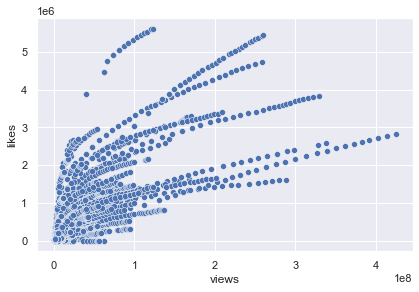

In [44]:
sns.scatterplot(x = data3['views'], y = data3['likes'])

<AxesSubplot:xlabel='log_views', ylabel='log_likes'>

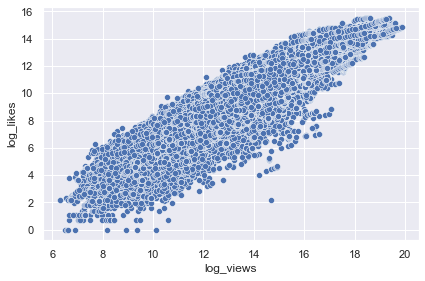

In [45]:
data3['log_likes'] = np.log(data3['likes'])
data3['log_views'] = np.log(data3['views'])
sns.scatterplot(x = data3['log_views'], y = data3['log_likes'])

<AxesSubplot:xlabel='dislikes', ylabel='likes'>

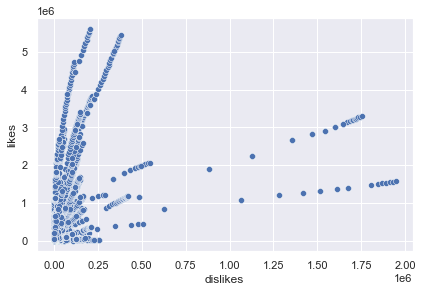

In [46]:
sns.scatterplot(x = data3['dislikes'], y = data3['likes'])

<AxesSubplot:xlabel='log_dislikes', ylabel='log_likes'>

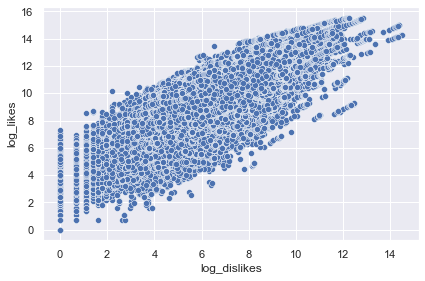

In [47]:
data3['log_dislikes'] = np.log(data3['dislikes'])
sns.scatterplot(x = data3['log_dislikes'], y = data3['log_likes'])

In [48]:
print(min(data3['log_likes']))

-inf


<AxesSubplot:xlabel='log_comment_count', ylabel='log_likes'>

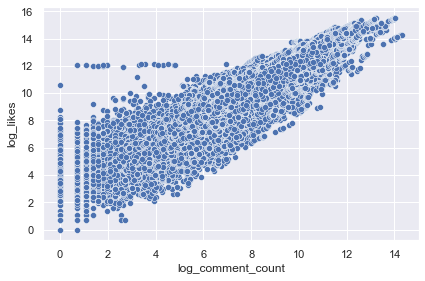

In [49]:
data3['log_comment_count'] = np.log(data3['comment_count'])
sns.scatterplot(x = data3['log_comment_count'], y = data3['log_likes'])

In [50]:
data4 = data3.drop(['views','likes','dislikes','comment_count', 'region'], axis=1)
data4 = data4.replace([np.inf, -np.inf],np.nan)
data4 = data4.dropna(axis=0)

In [51]:
data4.columns.values

array(['publish_day', 'publish_month', 'publish_weekday', 'publish_hour',
       'no_tags', 'category_2', 'category_10', 'category_15',
       'category_17', 'category_19', 'category_20', 'category_22',
       'category_23', 'category_24', 'category_25', 'category_26',
       'category_27', 'category_28', 'category_29', 'category_30',
       'category_43', 'log_likes', 'log_views', 'log_dislikes',
       'log_comment_count'], dtype=object)

In [52]:
cols=['log_likes', 'log_views', 'log_dislikes', 'log_comment_count',
      'publish_month', 'publish_day', 'publish_weekday', 'publish_hour', 'no_tags', 
      'category_2', 'category_10', 'category_15', 'category_17', 'category_19', 
      'category_20', 'category_22', 'category_23', 'category_24', 'category_25', 
      'category_26', 'category_27', 'category_28', 'category_29', 'category_30', 'category_43']

data4_plr = data4[cols]
data4_plr.head()

,log_likes,log_views,log_dislikes,log_comment_count,publish_month,publish_day,publish_weekday,publish_hour,no_tags,category_2,...,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43
0,13.576523,16.658009,10.678675,11.743100,11,10,4,17,6,0,...,0,0,0,0,0,0,0,0,0,0
1,11.758175,13.830055,7.431300,9.475010,11,13,0,17,11,0,...,0,1,0,0,0,0,0,0,0,0
2,11.891602,14.975981,8.582794,9.009570,11,12,6,19,23,0,...,0,1,0,0,0,0,0,0,0,0
3,11.792366,14.555459,7.595387,9.770984,11,12,6,18,14,0,...,0,0,1,0,0,0,0,0,0,0
4,14.306621,17.327761,9.956175,11.351194,11,9,3,11,10,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
corr_ft_ = data4_plr[[ 
       'log_comment_count','publish_month', 'publish_day', 
       'publish_weekday', 'publish_hour', 'no_tags']]
vif_ = pd.DataFrame()
vif_['VIF'] = [variance_inflation_factor(corr_ft_.values,i) for i in range (corr_ft_.shape[1])]
vif_['Features'] = corr_ft_.columns
vif_

,VIF,Features
0,7.797447,log_comment_count
1,2.615442,publish_month
2,3.809542,publish_day
3,2.921412,publish_weekday
4,4.646855,publish_hour
5,3.438456,no_tags


In [57]:
x = data4_plr.drop(['log_likes'], axis = 1)
y = data4_plr['log_likes']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

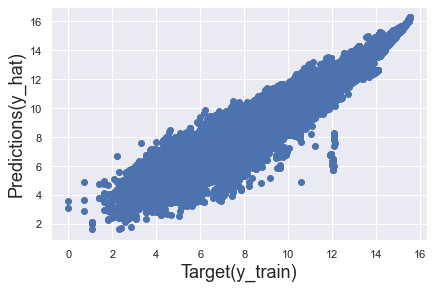

In [60]:
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Target(y_train)', fontsize = 18)
plt.ylabel('Predictions(y_hat)', fontsize = 18)
plt.show()

In [61]:
reg.score(x_train,y_train)

0.8994861067161182

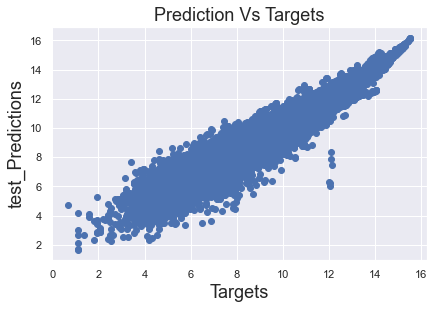

In [62]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets', fontsize = 18)
plt.ylabel('test_Predictions', fontsize = 18)
plt.title('Prediction Vs Targets',fontsize = 18)
plt.show()

In [63]:
reg.score(x_test, y_test)

0.8984511335854242

In [64]:
data5 = data2.copy()
data5 = data5.drop(['trending_date', 'publish_date', 'days_diff', 'publish_year', 'publish_time', 'tags', 'region'], axis = 1)

In [65]:
categories1 = pd.get_dummies(data5['category_id'])
data5 = pd.concat((data5,categories1), axis = 1)
data5 = data5.drop(['category_id', 'category'], axis = 1)
data5.columns.values

array(['views', 'likes', 'dislikes', 'comment_count', 'publish_day',
       'publish_month', 'publish_weekday', 'publish_hour', 'no_tags', 1,
       2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43],
      dtype=object)

In [66]:
column_names1 = ['views', 'likes', 'dislikes', 'comment_count', 
                 'publish_day', 'publish_month', 'publish_weekday', 'publish_hour', 'no_tags', 
                 'category_1','category_2', 'category_10', 'category_15', 'category_17', 'category_19', 
                 'category_20', 'category_22', 'category_23', 'category_24',  'category_25', 'category_26', 
                 'category_27', 'category_28', 'category_29', 'category_30', 'category_43']
data5.columns = column_names1
data5.head()

,views,likes,dislikes,comment_count,publish_day,publish_month,publish_weekday,publish_hour,no_tags,category_1,...,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43
0,17158579,787425,43420,125882,10,11,4,17,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1014651,127794,1688,13030,13,11,0,17,11,0,...,0,1,0,0,0,0,0,0,0,0
2,3191434,146035,5339,8181,12,11,6,19,23,0,...,0,1,0,0,0,0,0,0,0,0
3,2095828,132239,1989,17518,12,11,6,18,14,0,...,0,0,1,0,0,0,0,0,0,0
4,33523622,1634130,21082,85067,9,11,3,11,10,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data5_prf = data5.copy()

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [69]:
x1 = data5_prf.drop(['likes'],axis = 1)
y1 = data5_prf['likes']

In [70]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.2, random_state = 42)

In [71]:
'''def get_mae(n_estimators,x_train1, x_test1, y_train1, y_test1):
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = 30)
    model.fit(x_train1, y_train1)
    preds_val = model.predict(x_test1)
    mae = mean_absolute_error(y_test1, preds_val)
    return(mae)'''

'def get_mae(n_estimators,x_train1, x_test1, y_train1, y_test1):\n    model = RandomForestRegressor(n_estimators = n_estimators, random_state = 30)\n    model.fit(x_train1, y_train1)\n    preds_val = model.predict(x_test1)\n    mae = mean_absolute_error(y_test1, preds_val)\n    return(mae)'

In [72]:
'''candidate_n_estimators = [200, 250,300,350,400]
# Write loop to find the optimal number of trees in order to prevent overfitting.
for i in candidate_n_estimators :
    mae = get_mae(i, x_train1, x_test1, y_train1, y_test1) 
    print (mae)
# the best number of trees is around 300'''

'candidate_n_estimators = [200, 250,300,350,400]\n# Write loop to find the optimal number of trees in order to prevent overfitting.\nfor i in candidate_n_estimators :\n    mae = get_mae(i, x_train1, x_test1, y_train1, y_test1) \n    print (mae)\n# the best number of trees is around 300'

In [73]:
model = RandomForestRegressor(n_estimators = 300, random_state = 30)
model.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=300, random_state=30)

In [74]:
y_hat_test1 = model.predict(x_test1)
mae = mean_absolute_error(y_test1, y_hat_test1)
print(mae)

4638.454357248094


<AxesSubplot:ylabel='Density'>

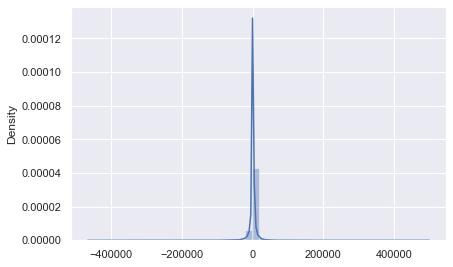

In [75]:
residuals=y_hat_test1 - y_test1
sns.distplot(x=residuals)

In [76]:
residuals.describe(percentiles=[0.1,0.25,0.50,0.75,0.90])

count     31428.000000
mean         63.535780
std       13559.004725
min     -461983.609333
10%       -4653.094167
25%        -659.557500
50%         126.368333
75%        1555.256667
90%        5638.615000
max      495000.377833
Name: likes, dtype: float64

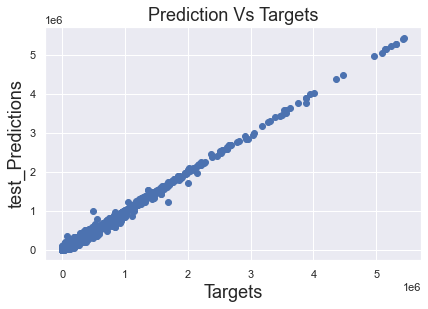

In [77]:
plt.scatter(x=y_test1, y=y_hat_test1)
plt.xlabel('Targets', fontsize=18)
plt.ylabel('test_Predictions', fontsize=18)
plt.title('Prediction Vs Targets',fontsize=18)
plt.show()